In [18]:
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
import colour
import cv2 as cv

from colour_demosaicing import (
    EXAMPLES_RESOURCES_DIRECTORY,
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)

def white_balance(img):
    result = cv.cvtColor(img, cv.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 1.1)
    result = cv.cvtColor(result, cv.COLOR_LAB2BGR)
    return result

import colour
import cv2 as cv

def bin_image(img, size=2):
    bin_imgs = []
    for i in range(size):
        for j in range(size):
            bin_imgs.append(img[i::size,j::size])

    binned_img = np.mean(np.array(bin_imgs), axis = 0)
    return binned_img

def demosaic_bin_image(img, size = 2):
    binned_img = bin_image(img, size=size)
    img_demosaic = demosaicing_CFA_Bayer_bilinear(binned_img)
    return img_demosaic

In [19]:
test_img = iio.imread(r"D:\BP_RF_RGB_CAM\4_1\RGB_Polarized_Camera\RGB_Polarized_Camera_16.bmp")

In [20]:
test_img.shape

(2048, 2448)

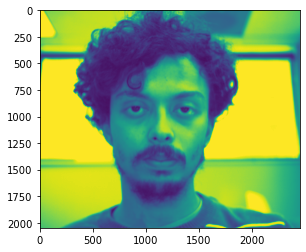

In [21]:
plt.imshow(test_img)

In [22]:
test_img[0,50]

193

In [23]:
rgb_img = cv.cvtColor(test_img, cv.COLOR_BAYER_RG2BGR)

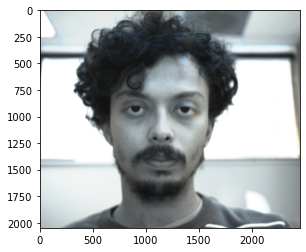

In [24]:
plt.imshow(rgb_img)

In [25]:
rgb_img[0,50]

array([158, 225, 227], dtype=uint8)

In [26]:
test_img2 = demosaicing_CFA_Bayer_bilinear(test_img)
print(test_img2.shape)

(2048, 2448, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


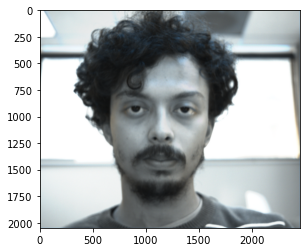

In [27]:
plt.imshow(test_img2/255)

In [28]:
print(test_img2[0,50], test_img2[0,51], test_img2[1,50], test_img2[1,51])
print(np.mean(np.array([test_img2[0,50], test_img2[0,51], test_img2[1,50], test_img2[1,51]]), axis=0))

[ 289.5   164.    113.25] [ 291.75  271.25  114.5 ] [ 158.   225.   226.5] [ 177.25  201.    229.  ]
[ 229.125   215.3125  170.8125]


In [29]:
test_img3 = bin_image(rgb_img.astype(np.float32))

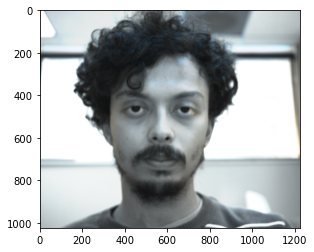

In [30]:
plt.imshow(test_img3/255)

In [31]:
test_img3[25,500]

array([ 70.  ,  73.75,  72.75], dtype=float32)

In [32]:
new_img = demosaic_bin_image(test_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


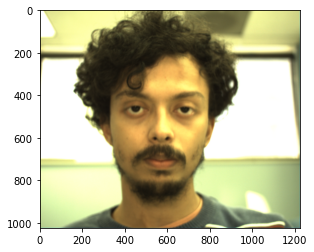

In [33]:
plt.imshow(new_img/255)

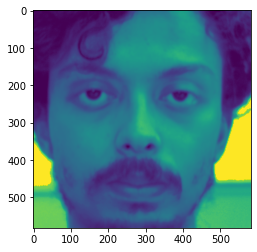

: 

In [40]:
from __future__ import print_function
import cv2 as cv
import argparse

def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//3, h//3), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]

    return faceROI

frame = new_img.astype(np.uint8)
face_cascade = cv.CascadeClassifier()
#-- 1. Load the cascades
if not face_cascade.load(cv.samples.findFile(r'C:\Users\111\Desktop\repos\syndicate\PostSyndicate\camera\haarcascade_frontalface_alt.xml')):
    print('--(!)Error loading face cascade')
    exit(0)
    exit(0)
#-- 2. Read the video stream
# while True:
# ret, frame = cap.read()
if frame is None:
    print('--(!) No captured frame -- Break!')
frame2 = detectAndDisplay(frame)

plt.imshow(frame2)

In [35]:
frame.dtype

dtype('uint8')

In [36]:
frame

array([[[ 61, 127,  63],
        [126,  62, 127],
        [126, 191, 127],
        ..., 
        [ 52,   4,  67],
        [ 52, 157,  67],
        [154,  59,  99]],

       [[126,  62, 127],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [206, 211, 135],
        [206, 210, 134],
        [103, 157, 199]],

       [[126, 191, 127],
        [255, 255, 255],
        [255, 255, 255],
        ..., 
        [208, 214, 135],
        [208, 210, 133],
        [104,   4, 198]],

       ..., 
       [[  9, 249,  70],
        [176, 200, 140],
        [176, 200, 139],
        ..., 
        [110, 136, 108],
        [112, 138, 109],
        [ 56, 102, 166]],

       [[  9, 148,  69],
        [177, 199, 138],
        [178, 199, 137],
        ..., 
        [110, 136, 109],
        [112, 135, 109],
        [ 56, 168, 164]],

       [[132,  38, 101],
        [ 88, 148, 203],
        [ 89, 249, 204],
        ..., 
        [ 55, 100, 165],
        [ 56, 166, 164],
        [ 28,  67,